In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Represent a die
The first thing I will need is to define how many sides your dice will have. You can even go a step further and represent a die by using a numpy array and assigning to each side a label which will be equal to the number of that side:

In [2]:
n_sides = 6 
die = np.array([i for i in range(1, n_sides+1)])
die

array([1, 2, 3, 4, 5, 6])

# Roll the die
With your die ready it is time to roll it. For now you will assume that the die is fair, which means the probability of landing on each side is the same (it follows a uniform distribution). To achieve this behaviour you can use the function np.random.choice, which given a numpy array returns one of the entries in it randomnly:

In [3]:
np.random.choice(die)

1

This is great but if you wanted to roll the die 20 times you will need to run the cell 20 times and record each result. Now you need a way to simulate several rolls at the same time. For this you can define the number of rolls you desire and use a list comprehension to roll the die as many times as you like, you can also save every roll in a numpy array:

In [4]:
n_rolls = 20 

rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])
rolls

array([6, 2, 6, 1, 5, 5, 1, 4, 2, 2, 3, 2, 5, 4, 3, 4, 6, 1, 3, 1])

In [5]:
m = np.mean(rolls)
v = np.var(rolls)
print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

mean of rolls: 3.30
variance of rolls: 3.01


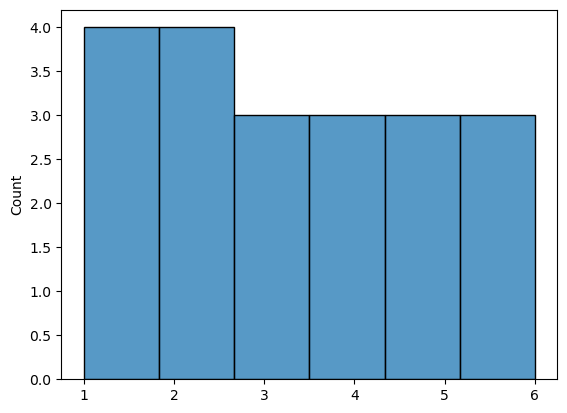

In [6]:
sns.histplot(rolls)
plt.show()

mean of rolls: 3.49
variance of rolls: 2.95


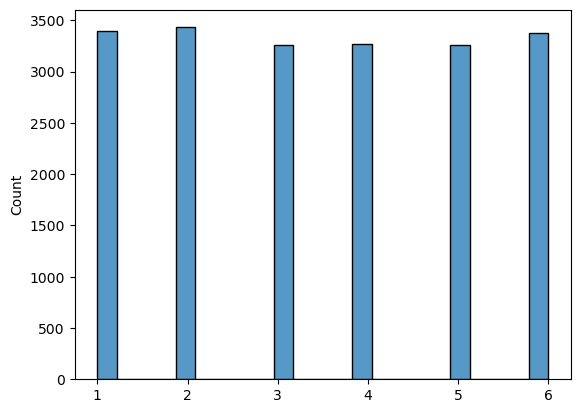

In [7]:
n_rolls = 20_000 
rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])
print(f"mean of rolls: {np.mean(rolls):.2f}\nvariance of rolls: {np.var(rolls):.2f}")
sns.histplot(rolls)
plt.show()


mean of first_rolls: 3.51
variance of first_rolls: 2.91

mean of second_rolls: 3.50
variance of second_rolls: 2.93

mean of sum_of_rolls: 7.02
variance of sum_of_rolls: 5.89

covariance between first and second roll:
[[2.91260874 0.02263694]
 [0.02263694 2.92993527]]


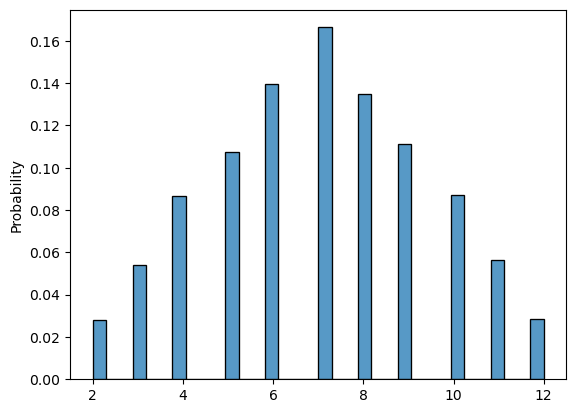

In [8]:
n_rolls = 20_000 
first_rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])
second_rolls = np.array([np.random.choice(die)  for _ in range(n_rolls)])
sum_of_rolls = first_rolls + second_rolls
print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
sns.histplot(sum_of_rolls, stat = "probability")
plt.show()

In [9]:
def load_dice(n_sides, loaded_number):
    probs = np.array([1/(n_sides+1) for _ in range(n_sides)])
    probs [loaded_number-1] = 1 - sum(probs[:-1])
    if not np.isclose(sum(probs), 1):
        print("All probabilities should add up to 1")
        return
    
    return probs

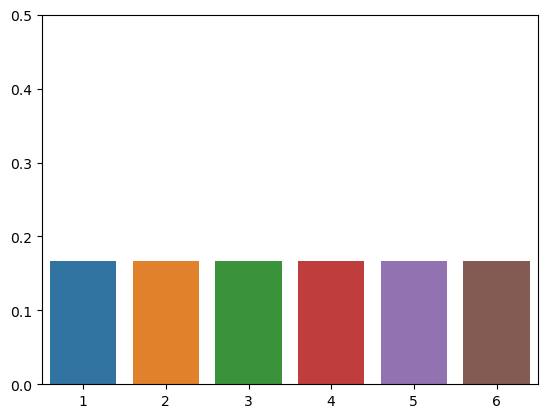

In [10]:
probs_fair_die = np.array([1/n_sides]* n_sides)
fair_die_sides = sns.barplot(x=die, y=probs_fair_die)
fair_die_sides.set_ylim(0,0.5)
plt.show()

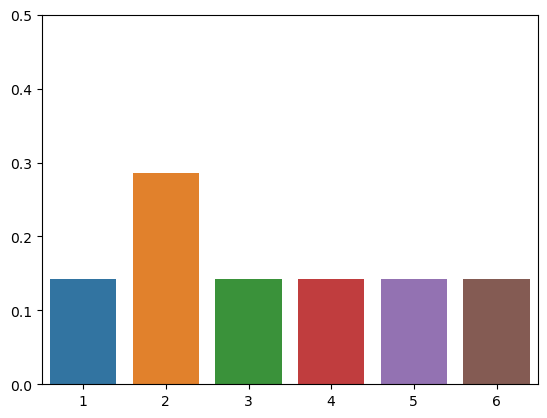

In [11]:
probs_loaded_die = load_dice(n_sides, loaded_number=2)

# Plot probabilities
loaded_die_sides = sns.barplot(x=die, y=probs_loaded_die)
loaded_die_sides.set_ylim(0,0.5)
plt.show()

mean of first_rolls: 3.26
variance of first_rolls: 2.77

mean of second_rolls: 3.28
variance of second_rolls: 2.77

mean of sum_of_rolls: 6.55
variance of sum_of_rolls: 5.54

covariance between first and second roll:
[[2.76655877e+00 4.18080904e-04]
 [4.18080904e-04 2.77252582e+00]]


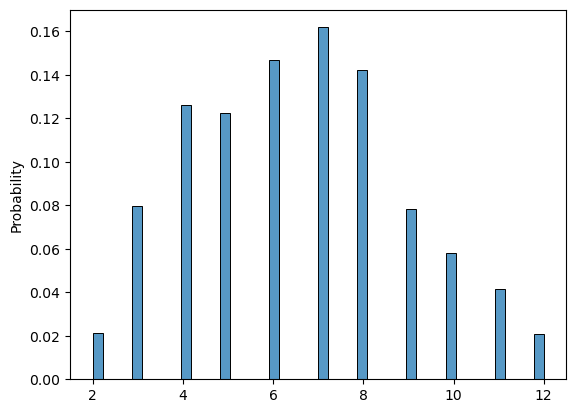

In [12]:
n_rolls = 20_000

# Notice that the p parameter is being set
first_rolls = np.array([np.random.choice(die, p=probs_loaded_die) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(die, p=probs_loaded_die) for _ in range(n_rolls)])

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")


sns.histplot(sum_of_rolls, stat = "probability")
plt.show()

mean of first_rolls: 3.49
variance of first_rolls: 2.93

mean of second_rolls: 1.74
variance of second_rolls: 4.50

mean of sum_of_rolls: 5.23
variance of sum_of_rolls: 12.68

covariance between first and second roll:
[[2.92841938 2.62531575]
 [2.62531575 4.50406644]]


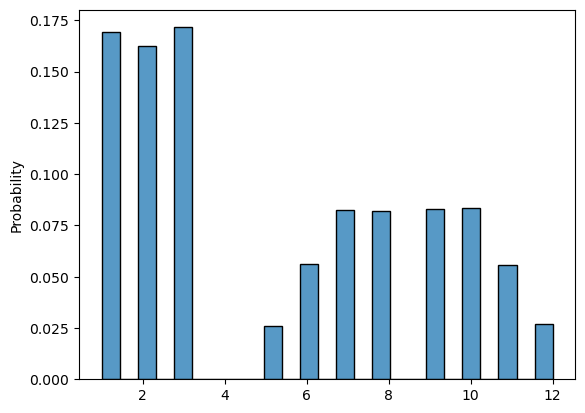

In [13]:
n_rolls = 20_000

first_rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(die) for _ in range(n_rolls)])

# Preserve the result of the second throw only if the first roll was greater or equal to 4
second_rolls = np.where(first_rolls>=4, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")


sns.histplot(sum_of_rolls, stat = "probability")
plt.show()